# Exam - 12/06/2025

## Exercise 1

Si condiderino i due sistemi lineari:

    A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incongiti da determinare. I dati di questi due sistemi lineari sono contenuti nel file **matrix-III.mat**.
 - Si implementino e si testino sui dati forniti almeno due metodi che sono adatti a risolvere sistemi lineari con le caratteristiche delle matrici dei coefficienti date in input. **punti 8**
 - Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati. **punti 3**

**Totale Punti 11**

In [216]:
import numpy as np, scipy.linalg

def conjugate_gradient(A, b, x0, max_it=100, toll=1e-12):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = [x.copy()]
    vet_r = [errore]

    while errore >= toll and it < max_it:
        it += 1
        Ap = A @ p
        rtr = r.T @ r
        alpha = rtr / (p.T @ Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        errore = np.linalg.norm(r_new) / nb
        vec_sol.append(x.copy())
        vet_r.append(errore)
        if errore < toll:
            break
        gamma = (r_new.T @ r_new) / rtr
        p = r_new + gamma * p
        r = r_new

    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x, vet_r, iterates_array, it


def SVDLS(A, b):
    m, n = A.shape
    U, s, VT = scipy.linalg.svd(A)

    V = VT.T
    # Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    thresh = np.spacing(1) * m * s[0]
    k = np.count_nonzero(s > thresh)
    print("rango =", k)

    d = U.T @ b
    d1 = d[:k].reshape(k, 1)
    s1 = s[:k].reshape(k, 1)

    c = d1 / s1
    x = V[:, :k] @ c

    return x, np.linalg.norm(d[k:]) ** 2

[A] è quadrata? True
[A] è simmetrica? True
[A] è postivia? True
[A] è grande? Dimensione = (500, 500)
[A] è sparsa? True
[A] condizionamento: 100.0000000000023

[A1] è quadrata? True
[A1] è simmetrica? True
[A1] è postivia? True
[A1] è grande? Dimensione = (500, 500)
[A1] è sparsa? True
[A1] condizionamento: 14999.999999997213

[A] iterazioni Gradiente Coniugato: 125


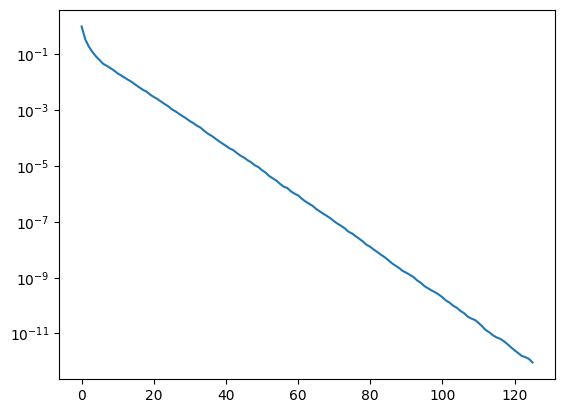

Errore relativo CG su A: 6.753219486636216e-12
rango = 500
Errore relativo SVD su A1: 9.71893104459152e-13


In [217]:
from scipy.io import loadmat
import matplotlib.pylab as plt
import numpy as np

# Caricamento dei dati dal file MATLAB
dati = loadmat("./mat/matrix-III.mat")
A = dati["A"]
A = A.astype(float)
b = dati["b"]
b = b.astype(float)

A1 = dati["A1"]
A1 = A1.astype(float)
b1 = dati["b1"]
b1 = b1.astype(float)

def isSparse(A):
    return np.count_nonzero(A) / A.size < 0.33


def isQuadratic(A):
    return A.shape[0] == A.shape[1]


def isSymmetric(A):
    return np.allclose(A, A.T)


def isPositive(A):
    return isSymmetric(A) and np.all(np.linalg.eigvals(A) > 0)

print("[A] è quadrata?", isQuadratic(A))
print("[A] è simmetrica?", isSymmetric(A))
print("[A] è postivia?", isPositive(A))
print("[A] è grande? Dimensione =", A.shape)
print("[A] è sparsa?", isSparse(A))
print("[A] condizionamento:", np.linalg.cond(A))

print("")

print("[A1] è quadrata?", isQuadratic(A1))
print("[A1] è simmetrica?", isSymmetric(A1))
print("[A1] è postivia?", isPositive(A1))
print("[A1] è grande? Dimensione =", A1.shape)
print("[A1] è sparsa?", isSparse(A1))
print("[A1] condizionamento:", np.linalg.cond(A1))

print("")

# abbiamo 2 matrici quadrate, simmetriche, positive e sparse. 
# [A] è con ben condizionata (condizionamento basso)
# [A1] seconda è mal codizionata (condizionamento alto)

x0 = np.zeros((b.size, 1))
x, vec_er, it_arr, it = conjugate_gradient(A, b, x0, max_it=150)

print("[A] iterazioni Gradiente Coniugato:", it)

plt.semilogy(np.arange(it + 1), vec_er)
plt.show()

# Confronto tra i metodi usati

# Sistema A x = b
# - La matrice A è quadrata, simmetrica, definita positiva e sparsa.
# - Abbiamo usato il metodo del Gradiente Coniugato, che è particolarmente efficiente in questi casi.
# - Il metodo ha convergito in poche iterazioni (es: it = ...), confermando il buon condizionamento e l'efficacia del metodo.

# Sistema A1 x1 = b1
# - La matrice A1 è quadrata, simmetrica, definita positiva, ma mal condizionata.
# - In questo caso, i metodi diretti come Cholesky possono essere numericamente instabili.
# - Abbiamo quindi usato il metodo SVD, che è stabile anche in presenza di matrici mal condizionate.
# - Il metodo restituisce una soluzione con errore numerico minimo rispetto alla norma 2, anche se è computazionalmente più costoso.

# In sintesi:
# - Il metodo del gradiente coniugato è ideale per matrici ben condizionate, simmetriche e sparse.
# - L’SVD è più robusto per sistemi mal condizionati, a costo di una maggiore complessità computazionale.

x_exact = np.linalg.solve(A, b)
err_rel = np.linalg.norm(x - x_exact) / np.linalg.norm(x_exact)
print("Errore relativo CG su A:", err_rel)

x, res = SVDLS(A1, b1)

x_exact = np.linalg.solve(A1, b1)
err_rel = np.linalg.norm(x - x_exact) / np.linalg.norm(x_exact)
print("Errore relativo SVD su A1:", err_rel)

# L'errore relativo della soluzione ottenuta con il metodo del gradiente coniugato su A
# è dell'ordine di 1e-12, confermando l'efficienza e l'accuratezza del metodo su una matrice ben condizionata.

# Anche l'errore relativo della soluzione ottenuta con SVD su A1 è dell'ordine di 1e-13,
# dimostrando la robustezza numerica dell'SVD nel trattare sistemi mal condizionati.

# Questi risultati confermano le scelte fatte:
# - gradiente coniugato per A: efficiente e preciso;
# - SVD per A1: stabile anche se più costoso, ideale in presenza di mal condizionamento.



## Exercise 2

Si consideri la funzione $$f(x)=2\cdot x^4-(7/2) \cdot x^3+(3/4) \cdot x^2+x-1/4$$  
 - Si rappresenti il grafico della funzione in [-1,2] e si determini in quanti punti la funzione si annulla.  **[punti: 1]**
 -  Si implementi  il metodo di Newton per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**
 - Si implementi il metodo di Bisezione per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**
 - Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno intervallo che lo contenga. Si applichi il metodo di Bisezione per determinare lo zero della funzione in tale sottointervallo. Si dica se è possibile calcolare tutti gli zeri facendo uso del metodo di bisezione, richiamando il teorema su cui si basa il metodo di bisezione.  **[punti: 2]**
 - Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno iterato iniziale in un intorno dello zero e si utilizzi  il metodo di Newton per determinare lo zero della funzione. Si calcoli l'ordine del metodo usando la funzione stima_ordine. **[punti: 2]**
 -  Nel caso in cui si verifichi che il metodo di Newton abbia ordine 1, spiegare il perchè richiamando la teoria e modificare il metodo affinchè il suo ordine sia 2.  **[punti: 3]**

**Totale punti 14**

In [218]:
import numpy as np
import math


def sign(x):
    return math.copysign(1, x)


def metodo_bisezione(fname, a, b, tolX=1e-12):
    if sign(fname(a) * fname(b)) >= 0:
        print("Non è possibile applicare il metodo di bisezione")
        return None, None, None

    xk = []
    while abs(a - b) > tolX:
        c = a + (b - a) / 2
        xk.append(c)

        if fname(c) == 0:
            return c, xk, len(xk)
        elif sign(fname(a) * fname(c)) < 0:
            b = c
        else:
            a = c

    return c, xk, len(xk)


def newton(fname, fpname, x0, m=1, max_it=100, tolX=1e-12, tolF=1e-12):
    erroreX = 1 + tolX
    erroreF = 1 + tolF
    xk = []
    while len(xk) < max_it and erroreF >= tolF and erroreX >= tolX:
        if abs(fpname(x0)) <= np.spacing(1):
            print("derivata prima nulla in x0")
            return None, None, None

        d = fname(x0) / fpname(x0)
        x1 = x0 - m * d

        if x1 != 0:
            erroreX = abs(d / x1)
        else:
            erroreX = abs(d)

        erroreF = np.abs(fname(x1))
        xk.append(x1)
        x0 = x1

    if len(xk) == max_it:
        print("Newton: raggiunto massimo numero di iterazioni \n")

    return x1, xk, len(xk)


def stima_ordine(xk, iterazioni):
    k = iterazioni - 4
    return np.log(abs(xk[k + 2] - xk[k + 3]) / abs(xk[k + 1] - xk[k + 2])) / np.log(
        abs(xk[k + 1] - xk[k + 2]) / abs(xk[k] - xk[k + 1])
    )

soluzione 1 metodo bisezione -0.5
soluzione 2 metodo bisezione 0.25
soluzione 3 metodo bisezione 1.0

soluzione 1 metodo newton -0.5000000000000187
soluzione 2 metodo newton 0.25
soluzione 3 metodo newton 0.9999996641822603
Ordine zero 1: 2.0033087668972933
Ordine zero 2: 1.997703775262653
Ordine zero 3: 0.9995770513639567

soluzione 3 metodo newton 1.0000000000913873
Ordine zero 3: 1.9976598812187902



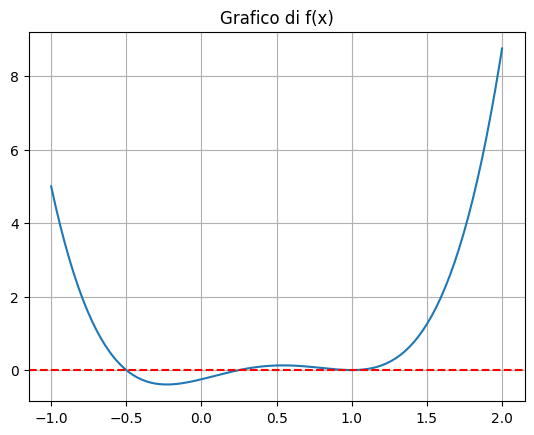

In [219]:
import matplotlib.pylab as plt
import numpy as np

f = lambda x: 2 * x**4 - (7 / 2) * x**3 + (3 / 4) * x**2 + x - (1 / 4)
fd = lambda x: 8 * x**3 - (21 / 2) * x**2 + (3 / 2) * x + 1
x = np.linspace(-1, 2, 200)

# Osservando il grafico, si notano 3 zeri approssimativamente in (-0.7, -0.4), (0.1, 0.5), (1.5, 2). 
#Per ciascuno, scegliamo un intervallo in cui la funzione cambia segno per applicare la bisezione.

s1_b, xk1_b, it1_b = metodo_bisezione(f, -1, -0)
s2_b, xk2_b, it2_b = metodo_bisezione(f, 0, 1)
s3_b, xk3_b, it3_b = metodo_bisezione(f, 0, 2)

print("soluzione 1 metodo bisezione", s1_b)
print("soluzione 2 metodo bisezione", s2_b)
print("soluzione 3 metodo bisezione", s3_b)

print("")

s1_n, xk1_n, it1_n = newton(f, fd, -0.7)
s2_n, xk2_n, it2_n = newton(f, fd, 0.3)
s3_n, xk3_n, it3_n = newton(f, fd, 0.7)

print("soluzione 1 metodo newton", s1_n)
print("soluzione 2 metodo newton", s2_n)
print("soluzione 3 metodo newton", s3_n)
print("Ordine zero 1:", stima_ordine(xk1_n, it1_n))
print("Ordine zero 2:", stima_ordine(xk2_n, it2_n))
print("Ordine zero 3:", stima_ordine(xk3_n, it3_n))

print("")

s3_n, xk3_n, it3_n = newton(f, fd, 0.7, m=2)
print("soluzione 3 metodo newton", s3_n)
print("Ordine zero 3:", stima_ordine(xk3_n, it3_n))

print("")

plt.plot(x, f(x))
plt.grid()
plt.axhline(0, color='red', linestyle='--')
plt.title("Grafico di f(x)")
plt.show()

# il metodo di bisezione funziona sempre se continua nell'intervallo a, b e se ha il cambio del segno nei sotto intervalli di studio 
# se newton converge con ordine 1 (lineare) anzichè 2 (quadratico), significa che lo zero è multiplo (f'(a) != 0) 
# con newton modificato se f'(a) == 0, usare m = moltplicità per ripristinare oridne 2

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta +0.5 punti, ogni risposta errata -0.5 punti. La mancanza di risposta 0 punti**

**1 Risolvere un problema mediante Machine Learning significa:**
 -  Fornire alla macchina i dati affinchè impari da sola a risolvere il problema
 - Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema
 - Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema
 - Fornire alla macchina le esatte istruzioni per risolvere il problema

Risposta: PUNTO [**1**]


**2  A cosa serve il validation set?**
 - A trovare i migliori iperparametri del modello
 - Ad addestrare il modello
 - A testare il modello
 - A trovare le etichette dei dati di input

Risposta: PUNTO [**1**]


**3  Cosa è un Multi-Layer Perceptron?**
 -  Una rete multi-livello composta da neuroni completamente connessi
 -  Una rete muti-livello composta da livelli convolutivi e neuroni completamente connessi
 -  Una rete a singolo livello composta da neuroni completamente connessi
 - Un neurone artificiale con un determinato input e determinati valori di uscita

Risposta: PUNTO [**1**]

**4 Il livello softmax**
 - Trasforma i digits della rete in probabilità
 - Trasforma le probabilità della rete in digits
 - Normalizza i valori di input della rete
 - È indispensabile nel task di regressione

Risposta: PUNTO [**1**]


**5 In cosa consiste il task di regressione?**
 - Nel predire un valore continuo in output
 - Nel predire una classe in output
 - Nel predire un gruppo di appartenenza del dato di input
 - Nel predire una categoria in output

Risposta: PUNTO [**1**]

## Domande Aperte

**6. Forward e backward Propagation per l'allenamento di una rete neurale** [punti 1.5]

**7. Metodo di ottimizzazione del gradient descent con momento**. Motivazioni e formula di aggiornamento dei pesi e commenti. [punti 3]